Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Importing the Data

In [2]:
customer_data = pd.read_csv('Shopping Mall Customer Segmentation Data .csv')

Data Collection and Analysis

In [3]:
#first 5 rows in the dataset
customer_data.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,A0001,36,Male,141,9
1,A0002,63,Male,114,99
2,A0003,80,Male,122,99
3,A0004,43,Female,118,70
4,A0005,49,Female,123,79


In [4]:
#finding the number of rows and columns
customer_data.shape

(600, 5)

In [5]:
#gaining some information
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     600 non-null    object
 1   Age             600 non-null    int64 
 2   Gender          600 non-null    object
 3   Annual Income   600 non-null    int64 
 4   Spending Score  600 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 23.6+ KB


In [6]:
customer_data.isnull().sum()

Customer ID       0
Age               0
Gender            0
Annual Income     0
Spending Score    0
dtype: int64

Choosing the Annual Income & Spending Score Column

In [7]:
X = customer_data.iloc[:,[3,4]].values

In [8]:
print(X)

[[141   9]
 [114  99]
 [122  99]
 ...
 [111  71]
 [170  75]
 [122  23]]


Choosing the number of clusters

In [9]:
#WCSS - Within clusters sum of squares

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=40)
    kmeans.fit(X)

    wcss.append(kmeans.inertia_)

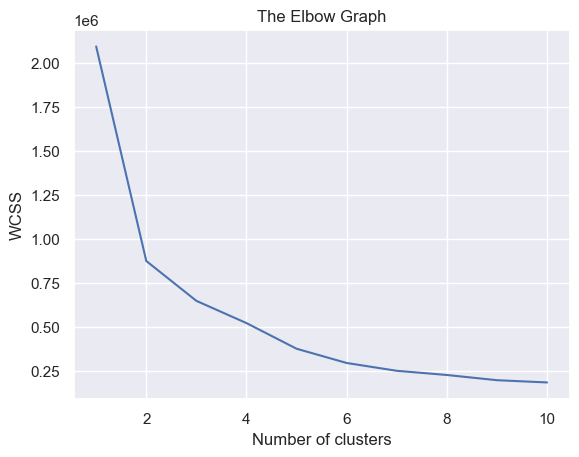

In [10]:
#plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Optimum number of clusters = 5

Training the K-Means Clustering Model

In [13]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X)
print(Y)

[0 5 5 5 5 2 2 1 5 4 2 0 4 0 3 0 3 3 0 0 4 2 4 5 2 1 2 4 0 4 3 1 4 2 2 4 2
 3 3 2 0 4 1 5 0 2 2 5 0 1 3 3 3 0 2 1 4 4 0 4 0 5 4 5 1 3 5 4 3 5 4 1 4 4
 3 4 5 1 0 5 3 0 3 2 0 3 2 0 3 2 5 5 5 2 0 4 1 2 3 0 2 4 3 1 4 5 2 2 1 4 4
 4 5 2 1 4 0 1 5 1 0 2 3 2 0 5 3 3 2 3 1 3 4 2 5 2 1 0 3 0 3 1 3 1 5 1 0 2
 4 0 4 1 1 3 2 5 0 4 1 1 3 2 5 5 1 4 3 3 5 3 2 4 5 2 3 1 5 3 1 1 0 0 4 1 5
 0 4 2 3 2 5 3 3 2 0 5 2 1 0 3 2 0 3 1 1 3 4 5 2 0 5 2 0 2 2 3 5 5 2 5 2 1
 2 1 0 3 0 0 2 3 3 4 4 1 1 3 1 4 2 5 0 4 0 1 2 1 4 4 1 1 4 2 0 4 3 1 5 1 0
 5 3 3 4 2 4 2 2 5 4 4 1 0 2 0 0 4 2 2 4 3 2 2 3 2 0 3 1 5 3 3 2 1 2 5 2 0
 2 5 3 1 5 0 0 2 1 5 3 3 4 0 4 2 2 1 2 4 3 3 5 3 3 5 1 0 3 4 0 4 1 5 0 1 1
 0 3 1 1 2 2 2 1 4 0 0 2 0 0 2 0 3 5 1 4 0 1 0 0 1 5 4 3 4 4 3 0 1 3 5 2 4
 3 0 3 1 1 3 0 0 4 1 1 0 1 0 2 3 4 3 2 5 3 0 1 2 4 2 3 3 5 1 4 2 1 1 3 0 0
 1 3 0 0 5 3 1 2 1 4 1 2 4 3 5 1 5 2 0 0 0 4 1 5 3 5 1 5 2 2 0 3 4 3 1 0 5
 1 1 4 2 0 2 3 0 0 0 3 0 5 0 0 2 5 2 2 5 2 5 0 5 1 3 3 4 1 5 5 5 5 0 0 2 3
 3 1 3 1 5 2 5 2 1 0 0 5 

Visualizing all the clusters

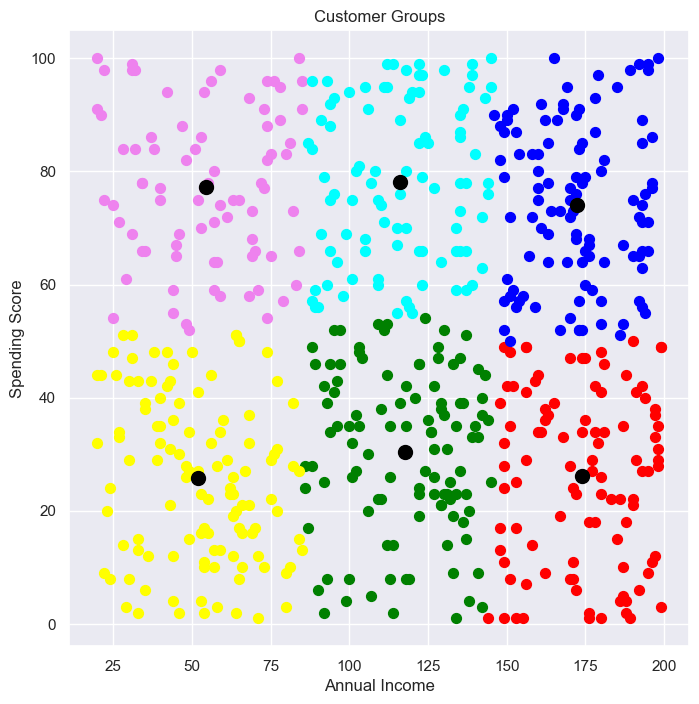

In [15]:
#plotting all the Clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='blue', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='violet', label='Cluster 5')
plt.scatter(X[Y==5,0], X[Y==5,1], s=50, c='cyan', label='Cluster 6')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()